In [2]:
import pandas_datareader as pdf
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.formula.api as smf
import statsmodels.api as sm
import seaborn as sns

In [3]:
fed_data1 = pdf.get_data_fred(['UNRATE', 'FEDFUNDS', 'INDPRO', 'POILBREUSDM', 'W823RC1'])

In [4]:
fed_data1.describe()

,UNRATE,FEDFUNDS,INDPRO,POILBREUSDM,W823RC1
count,59.000000,59.000000,59.000000,55.000000,58.000000
mean,5.047458,1.063220,100.375137,60.676663,1037.772414
std,2.321070,0.904785,3.910134,13.400089,71.217874
min,3.500000,0.050000,84.201800,23.337273,921.600000
25%,3.800000,0.090000,99.727000,52.960497,974.925000
50%,4.100000,1.150000,101.356100,63.602174,1037.650000
75%,5.600000,1.870000,102.613550,70.273715,1090.250000
max,14.700000,2.420000,104.585300,83.650000,1197.000000


In [5]:
reg1='INDPRO~UNRATE+FEDFUNDS+POILBREUSDM+W823RC1'

In [6]:
reg1output=smf.ols(reg1, fed_data1).fit()

In [7]:
print(reg1output.summary())

                            OLS Regression Results                            
Dep. Variable:                 INDPRO   R-squared:                       0.941
Model:                            OLS   Adj. R-squared:                  0.936
Method:                 Least Squares   F-statistic:                     197.9
Date:                Tue, 26 Apr 2022   Prob (F-statistic):           5.46e-30
Time:                        23:03:41   Log-Likelihood:                -75.674
No. Observations:                  55   AIC:                             161.3
Df Residuals:                      50   BIC:                             171.4
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept     101.3939      2.927     34.639      

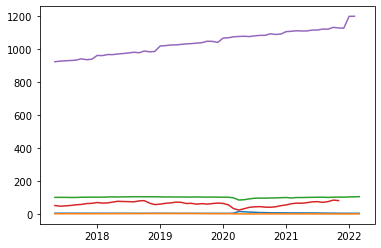

In [8]:
plt.plot(fed_data1)

In [9]:
fed_data1.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 59 entries, 2017-05-01 to 2022-03-01
Freq: MS
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   UNRATE       59 non-null     float64
 1   FEDFUNDS     59 non-null     float64
 2   INDPRO       59 non-null     float64
 3   POILBREUSDM  55 non-null     float64
 4   W823RC1      58 non-null     float64
dtypes: float64(5)
memory usage: 2.8 KB


In [10]:
covid_data = pd.read_csv('covid.csv', sep = ',')
covid_df = pd.DataFrame(covid_data).set_index('DATE')

In [11]:
covid_df.index = pd.to_datetime(covid_df.index)

Text(0, 0.5, 'COVID Cases')

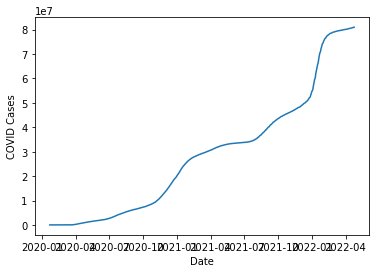

In [25]:
plt.plot(covid_df)
plt.xlabel('Date')
plt.ylabel('COVID Cases')

Text(0, 0.5, 'COVID Cases')

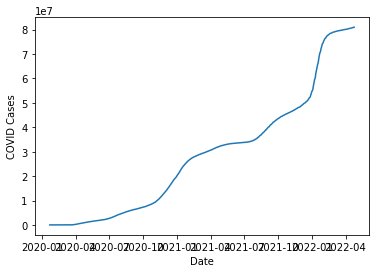

In [25]:
plt.plot(covid_df)
plt.xlabel('Date')
plt.ylabel('COVID Cases')

In [13]:
covid_df.index.name = 'DATE'
covid_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 824 entries, 2020-01-22 to 2022-04-24
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   Confirmed  824 non-null    int64
dtypes: int64(1)
memory usage: 12.9 KB


In [14]:
merge_df = [fed_data1, covid_df]
new_df = covid_df.merge(fed_data1, left_index=True, right_index=True)

In [15]:
new_df.head()

,Confirmed,UNRATE,FEDFUNDS,INDPRO,POILBREUSDM,W823RC1
DATE,,,,,,
2020-02-01,8,3.5,1.58,101.3247,55.003500,1066.6
2020-03-01,32,4.4,0.65,97.4477,32.981818,1072.4
2020-04-01,223254,14.7,0.05,84.2018,23.337273,1074.5
2020-05-01,1111409,13.2,0.05,85.8434,31.024762,1075.9
2020-06-01,1806075,11.0,0.08,91.1622,39.927273,1074.0


In [16]:
reg2 = 'Confirmed~UNRATE+FEDFUNDS+INDPRO+POILBREUSDM+W823RC1'

In [17]:
reg2output=smf.ols(reg2, new_df).fit()

In [18]:
print(reg2output.summary())

                            OLS Regression Results                            
Dep. Variable:              Confirmed   R-squared:                       0.989
Model:                            OLS   Adj. R-squared:                  0.985
Method:                 Least Squares   F-statistic:                     275.4
Date:                Tue, 26 Apr 2022   Prob (F-statistic):           6.30e-15
Time:                        23:03:42   Log-Likelihood:                -346.79
No. Observations:                  22   AIC:                             705.6
Df Residuals:                      16   BIC:                             712.1
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -4.373e+08   1.39e+08     -3.136      

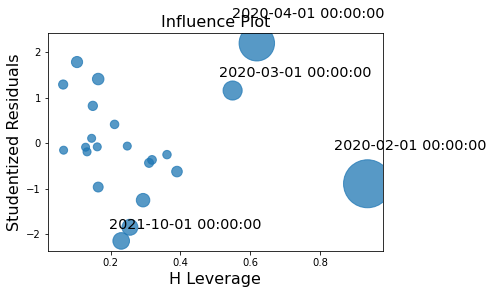

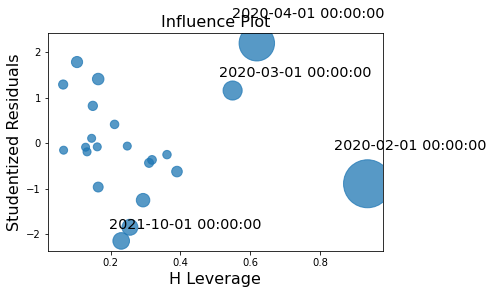

In [19]:
fig = sm.graphics.influence_plot(reg2output, criterion="cooks")
fig

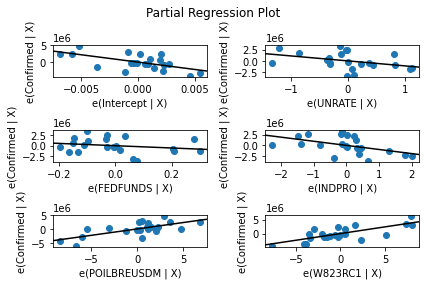

In [20]:
fig = sm.graphics.plot_partregress_grid(reg2output)
fig.tight_layout(pad=1.0)

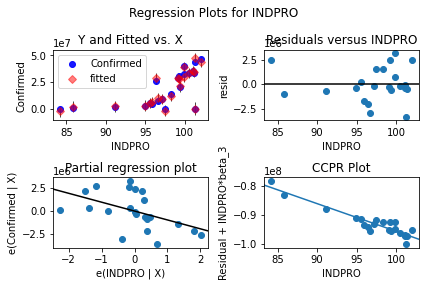

In [21]:
fig = sm.graphics.plot_regress_exog(reg2output, "INDPRO")
fig.tight_layout(pad=1.0)

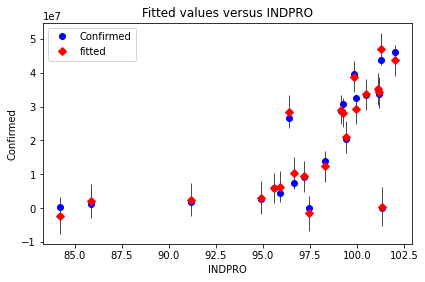

In [22]:
fig = sm.graphics.plot_fit(reg2output, "INDPRO")
fig.tight_layout(pad=1.0)

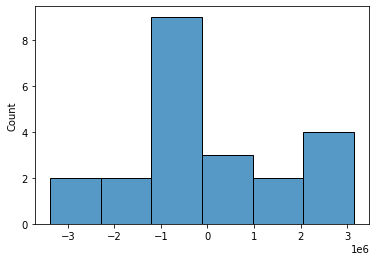

In [23]:
sns.histplot(reg2output.resid);

In [24]:
reg3 = 'W823RC1~UNRATE+FEDFUNDS+INDPRO+POILBREUSDM+Confirmed'
reg3output=smf.ols(reg3, new_df).fit()
print(reg3output.summary())

                            OLS Regression Results                            
Dep. Variable:                W823RC1   R-squared:                       0.981
Model:                            OLS   Adj. R-squared:                  0.975
Method:                 Least Squares   F-statistic:                     165.2
Date:                Tue, 26 Apr 2022   Prob (F-statistic):           3.50e-13
Time:                        23:03:44   Log-Likelihood:                -52.474
No. Observations:                  22   AIC:                             116.9
Df Residuals:                      16   BIC:                             123.5
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    1055.7843     74.910     14.094      